# Prereading

Familiarize yourself with the following.


## Markov Transition Kernels

---

For two states $s_0$ and $s_1$ and a matrix representing transition probabilities

$\left[\begin{array}{cc}\Pr(s_0 \rightarrow s_0) & \Pr(s_1 \rightarrow s_0)\\\Pr(s_0 \rightarrow s_1)& \Pr(s_1 \rightarrow s_1)\end{array}\right]  \left[\begin{array}{c}s_0^{(0)}\\ s_1^{(0)}\end{array}\right] = \left[\begin{array}{c}\Pr(s_0^{(1)} = s_0)\\ \Pr(s_1^{(0)} = s_1)\end{array}\right]$

For example 

- $\left[\begin{array}{cc}0.5 & 0.25\\0.5&0.75\end{array}\right] \left[\begin{array}{c}1\\ 0\end{array}\right] = \left[\begin{array}{c}0.5\\ 0.5\end{array}\right]$  

and 

- $\left[\begin{array}{cc}0.5 & 0.25\\0.5&0.75\end{array}\right] \left[\begin{array}{c}0\\ 1\end{array}\right] = \left[\begin{array}{c}0.25\\ 0.75\end{array}\right]$ 

and after $T$ transitions 

$\begin{align*}
\left[\begin{array}{cc}0.5 & 0.25\\0.5&0.75\end{array}\right]^T \left[\begin{array}{c}s_0^{(0)}\\ s_1^{(0)}\end{array}\right] & \approx {} \left[\begin{array}{cc}1/3& 1/3\\2/3&2/3\end{array}\right] \left[\begin{array}{c}s_0^{(0)}\\ s_1^{(0)}\end{array}\right] \quad \textrm{ for large } T\\ 
&={} \left[\begin{array}{c}s_0^{(T)}\\ s_1^{(T)}\end{array}\right] = \left[\begin{array}{c}1/3\\2/3\end{array}\right]\quad 
\color{gray}{\textrm{ for $s_j^{(0)}>0$ and } s_0^{(0)}+s_1^{(0)}=1 }
\end{align*}
$



In [ ]:
import numpy as np

A = np.array([[.5,.25],[.5,.75]]) 
s_t0 = np.array([[1],[0]]) 
s_t1 = A @ s_t0  # A.dot(np.array([[1],[0]]))
s_t1

In [ ]:
s_t = s_t1

In [ ]:
s_t = A @ s_t
s_t

In [ ]:
A = np.array([[.5,.25],[.5,.75]]) 

In [ ]:
# Repeatedly run this cell this a lot of times until convergence
A = A @ A  # A.dot(A)  
# and A**T is not right as that would be done is element-wise
A

In [ ]:
# Hmm...
A @ s_t0

In [ ]:
# And intial value doesn't matter
A @ (1-s_t0)

In [ ]:
A @ np.array([[0.25],[0.75]]) 

In [ ]:
from scipy import stats 
import matplotlib.pyplot as plt

In [ ]:
# Here's what it looks like if we flip coins  
# with transition probabilties defind by A sequentially
# and sure enough we recover 1/3 and 2/3 for 0 and 1 respectively
A = np.array([[.5,.25],[.5,.75]]) 
T = 200
s_t = np.zeros(T, dtype=int)
for t in range(1, T):
    s_t[t] = int(stats.uniform().rvs() < A[:,s_t[t-1]][1])
    
fig,ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(s_t)
ax[1].hist(s_t, bins=2, density=True);

In [ ]:
A

`A` here means that

- if we're currently a $0$ there's a 50\% chance that we'll stay a $0$ and 50\% chance that we'll change to a $1$
- and if we're currently a $1$ there's a 75\% chance that we'll stay a $1$ and 25\% chance that we'll change to a $0$

which specifies [geometric distributions](https://en.wikipedia.org/wiki/Geometric_distribution) with, respectively, expected values of $1$ and $3$ "failures before transitioning to the other state" which means that on average a "$0$ state" will be a run of two $0$'s while a "$1$ state" will be a run of four $1$'s which leads to the desired one-to-two (or one-thirds to two-thirds) ratio of $0$'s and $1$ is the Markov Chain. 


In [ ]:
# Here's what it looks like if we flip coins  
# with transition probabilties defind by A 
# and sure enough we recover 1/3 and 2/3 for 0 and 1 respectively
T = 10000
s_t = np.zeros(T, dtype=int)
for t in range(1, T):
    s_t[t] = int(stats.uniform().rvs() < A[:,s_t[t-1]][1])
    
state0_run_length = []
state1_run_length = []
run_length = 1
for t in range(1,T):
    if s_t[t]==s_t[t-1]:
        run_length += 1
    else:
        if s_t[t-1] == 0:
            state0_run_length += [run_length]
        else:
            state1_run_length += [run_length]        
        run_length = 1
        
fig,ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(state0_run_length)
ax[0].set_title("0 run lengths on aveage here are "+str(np.mean(state0_run_length).round(3)))
ax[1].hist(state1_run_length)
ax[1].set_title("1 run lengths on aveage here are "+str(np.mean(state1_run_length).round(3)));


## Metropolis-Hastings Transition Kernels

---

Accepting draws from a ***proposal distribution*** 

$\tilde x^{(t)} \sim q(\tilde x^{(t)}|x^{(t-1)})$

according to 

$x^{(t)} = \left\{\begin{array}{ll}
\tilde x^{(t)} & \text{with probability } \min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})}\right) \quad \color{gray}{\text{... is the normalizing constant needed for $p$?}}\\
x^{(t-1)} & \text{otherwise}
\end{array}\right.$

will produce draws from $p(x^{(t)})$.

### Discrete example

Suppose

$\begin{align}
q(\tilde x^{(t)} | x^{(t-1)}) &={} \left(\frac{1}{2}\right)^{1-{\tilde x^{(t)}}}\left(\frac{1}{2}\right)^{\tilde x^{(t)}} \quad \color{gray}{\textrm{ ... does } \quad \frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})} \quad  \textrm{ cancel?}}\\
\textrm{and} \quad p(x^{(t)}) &={} \left(\frac{1}{3}\right)^{1-{x^{(t)}}}\left(\frac{2}{3}\right)^{x^{(t)}}\\
\end{align}$

then 


$
\require{cancel}
\begin{align*}
\left[\begin{array}{cc}\Pr(s_0 \rightarrow s_0) & \Pr(s_1 \rightarrow s_0)\\\Pr(s_0 \rightarrow s_1)& \Pr(s_1 \rightarrow s_1)\end{array}\right] 
 &={} \left[\begin{array}{c|c} q(\tilde x^{(t)}=0 | x^{(t-1)}=0) & q(\tilde x^{(t)}=0 | x^{(t-1)}=1) \frac{p(\tilde x^{(t)}=0)}{p(x^{(t-1)}=1)} \\ 
+ \; \cancel{q(\tilde x^{(t)}=1 | x^{(t-1)}=0)\left(1-\cdots \right)}^0 & + \cancel{q(\tilde x^{(t)}=1 | x^{(t-1)}=1)\left(1-\cdots \right)}^0 \\ \hline
q(\tilde x^{(t)}=1 | x^{(t-1)}=0) \cancel{\frac{p(\tilde x^{(t)}=1)}{p(x^{(t-1)}=0)}}^1 & q(\tilde x^{(t)}=1 | x^{(t-1)}=1)\\
+ \cancel{q(\tilde x^{(t)}=0 | x^{(t-1)}=0)\left(1-\cdots \right)}^0 & +\; q(\tilde x^{(t)}=0 | x^{(t-1)}=1) (1- \frac{p(\tilde x^{(t)}=0)}{p(x^{(t-1)}=1)})\end{array}\right]\\
&={} \left[\begin{array}{cl} 0.5 & 0.25 = (1/2)((1/3)/(2/3)) \\ 0.5 & 0.75 = 1/2 + (1/2)(1-(1/3)/(2/3))\end{array}\right]
\end{align*}$

which was the original Markov transition kernel we first considered above.

--- 

### Continuous example

Suppose

$
\begin{align*}
p(x^{(t)}) & \rightarrow {} N(0,1)\\
q(\tilde x^{(t)}|x^{(t-1)}) & \rightarrow {} N(x^{(t-1)},\sigma)
\end{align*}
$



In [ ]:
p_x_pdf = lambda x: stats.norm().pdf(x)
q_xt_given_xtm1 = lambda x: stats.norm(x, scale=0.5)
proposal_distribution = q_xt_given_xtm1

m = 1000
x = np.zeros(m)
rejections = 0
for t in range(1,m):
    x_tilde = proposal_distribution(x[t-1]).rvs()
    acceptance_probability = min(1, p_x_pdf(x_tilde)/p_x_pdf(x[t-1]))
    if stats.uniform().rvs() < acceptance_probability:
        x[t] = x_tilde
    else:
        x[t] = x[t-1]
        rejections += 1

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x)
ax[1].hist(x, density=True)
x_support = np.linspace(-4,4,301)
ax[1].plot(x_support, p_x_pdf(x_support));

The **rejection rate** of the **Metropolis Hastings** algorithm given above is

In [ ]:
rejections/m

while the **effective sample size** for Markov chains is given by 

$n_{\text{eff}} = \frac{n}{\sum_{k=-\infty}^\infty\rho_k} = \frac{n}{1+2\sum_{k=1}^\infty\rho_k} \quad \text{ for order $k$ autocorrelations } \quad \rho_k$

so for the algorithm given above it is

In [ ]:
K = 300
autocorrelations = np.ones(K)
for t_plus_k in range(1, K):
    autocorrelations[t_plus_k] = np.corrcoef(x[:-t_plus_k], x[t_plus_k:])[0,1]

approximation_stop = (autocorrelations < 0).cumsum()
approximation_stop = approximation_stop*np.arange(K)
approximation_stop = min(approximation_stop[approximation_stop>0])

plt.plot(autocorrelations) 
plt.vlines(approximation_stop, ymin=0, ymax=1, color='k',
           label='higher order correlations\nafter this value will\neventually cancel out')
plt.legend()
# effective sample size
m / (1 + 2*autocorrelations[:approximation_stop].sum())

## (Discrete) Hidden Markov Models

- $S = \{1,\cdots, K\}$ are the possible hidden states
- $A$ where $A_{k'k} = p(y_t=k|y_{t-1}=k')$ is the $k' \rightarrow k$ hidden state transition probability from time $t-1 \rightarrow t$
- $X = \{x_1,\cdots, x_T\}$ with (emission probability) likelihoods $p(x_t|y_t=k)$ for hidden state $y_t = k$
- $\pi_0$ initial probability vector over the $K$ states of $S$

States are assumed to have Markov conditional independence so $p(y_t|y_{t-1}=k,y_{t-2},\cdots)=p(y_t|y_{t-1}=k)$.

And conditional emission indepdence is also assumed so that 
$p(x_t|y_t=k, y_{t-1},y_{t-2},\cdots, x_{t-1},x_{t-2},\cdots) = p(x_t|y_t=k)$.

### Forward Algorithm 

$p(x_t,x_{t-1},\cdots,x_{1}, y_t=k) = p(\mathbf{x_t}, y_t=k) = \sum_{k'=1}^K p(\mathbf{x_{t-1}}, y_{t-1}=k') A_{k'k} p(x_t|y_t=k)$

1. $p(x_1, y_1=k) = \pi_{0k} p(x_1|y_1=k)$ for $k=1,\cdots K$ 
2. For each $t$ at a time $p(\mathbf{x_t}, y_t=k) = \sum_{k'=1}^K p(\mathbf{x_{t-1}}, y_{t-1}=k') A_{k'k} p(x_t|y_t=k)$ for $k=1,\cdots K$
3. $p(\mathbf{x_T}) = \sum_{k=1}^K p(\mathbf{x_T}, y_t=k)$ 

### Viterbi Decoding Algorithm

The most likely hidden state trajectory up to time $t$

$\begin{align*}
\pi_{tk}^* &={} \displaystyle \max_{y_1,\cdots,y_{t-1}} p(y_{1},x_{1},y_{2},x_{2},\cdots, x_{t-1},y_{t-1}, x_{t},y_{t}=k)\\
\pi_{tk}^* &={} \max_{k'} \pi_{(t-1)k'}^* A_{k'k} p(x_t|y_t=k)
\end{align*}$

Rather than summing over the possible $y_t=k'$ as done in the forward algorithm, Viterbi takes the maximum.

1. $\pi_{1k}^* = \pi_{0k} p(x_1|y_1=k)$ for $k=1,\cdots K$ 
    1. Initialize paths: $s_{1k}=0$ for $k=1,\cdots K$ 
2. For each $t$ at a time $\pi_{tk}^* = \max_{k'} \pi_{(t-1)k'}^* A_{k'k} p(x_t|y_t=k)$
    1. Track optimal paths: $s_{tk} = \textrm{argmax}_{k'} \pi_{(t-1)k'}^* A_{k'k} p(x_t|y_t=k)$ for $k=1,\cdots K$
3. $\pi_{t}^* = \max_{k'} \pi_{tk'}^*$ 
    1. Optimal path endpoint: $s_{t} = \textrm{argmax}_{k'} \pi_{tk'}^*$
    
### Baum-Welch Forward-Backward Algorithm 

#### Backward Probability 

$p(x_{t+1}, x_{t+2}, \cdots, x_{T} | y_t=k) = p(\mathbf{\tilde x_{t+1}}| y_t=k)$

1. $p(\mathbf{\tilde x_{T+1}}| y_T=k) = 1$ for $k=1,\cdots K$ 
2. $p(\mathbf{\tilde x_{t}}| y_{t-1}=k) = \sum_{k'=1}^K A_{kk'} p(x_t|y_t=k')p(\mathbf{\tilde x_{t+1}}| y_{t}=k')$
3. $p(\mathbf{\tilde x_{1}}) = \sum_{k'=1}^K \pi_{0k'} p(x_1|y_1=k')p(\mathbf{\tilde x_{2}}| y_1=k')$

#### Transition $k' \rightarrow k$ from time  $t \rightarrow t+1$

$\displaystyle \Delta^{(t)}_{k'k} = p( y_t=k',y_{t+1}= k| \mathbf{x_T}) = \frac{p(\mathbf{x_t}, y_t=k')A_{k'k}p(x_{t+1}|y_{t+1}=k') p(\mathbf{\tilde x_{t+2}}| y_{t+1}=k)}{\sum_{t=1}^T p(\mathbf{x_t}, y_t=k)p(\mathbf{\tilde x_{t+1}}| y_{t}=k)}$

The forward probability $p(\mathbf{x_t}, y_t=k)$ and the backward probability $p(\mathbf{\tilde x_{t+1}}| y_{t}=k)$ are calculated given $A$ and $p(x_{t}|y_{t}=k')$, and of which can in turn be used to calculate $\Delta^{(t)}_{k'k}$. 

$A_{k'k}$ may then be refined to $\hat A_{k'k} = \frac{\sum_{t=1}^{T-1} \Delta^{(t)}_{k'k}}{\sum_{t=1}^{T-1} \sum_{k=1}^K\Delta^{(t)}_{k'k}}$ which is the sum of all calculated $k' \rightarrow k$ transition probabilities observed across all times divided by the sum of all calculated transition probabilities observed from $k' \rightarrow S$ ($k'$ to anywhere) at all. And this process repeatedly iterated until convergence. 

#### Emission Probabilities

$p(y_t=k'|\mathbf{ x_{T}}) = \sum_{k=1}^K \Delta^{t}_{k'k}$

$\displaystyle p(x_t=x^*|y_t=k') = \frac{\sum_{t=1}^T 1_{x*}(x_t) p(y_t=k'|\mathbf{ x_{T}})}{\sum_{t=1}^T p(y_t=k'|\mathbf{ x_{T}})}$




# Lecture

First hour of class

## Back to high dimensional integrations

$\begin{align*}
\theta = E[g(\mathbf{X})] {}=& \int g(\textbf{x})p_\theta(\textbf{x})d\textbf{x}\\
{}\approx& \frac{1}{n}\sum_{i=1}^n{g(\mathbf{x_i})} \textrm{ for } \mathbf{x_i} \sim p_\theta(\mathbf{x})
\end{align*}$

is hard

*[As you might recall from CC2]*
- Quadrature approximation begins breaking in 3D
- Uniform sampling based Monte Carlo methods also begin failing in the 5-10D range
- Despite the "dimension agnostic" suggestion of Monte Carlo integration<br>the only real hope is if sampling $\mathbf{x_i} \sim p(\textbf{x})$ is actually feasible 

## Something else to consider here

*[As you might again recall from CC2]*<br>
Density optimum does not represent the usual case in high dimensions

- $\hat \theta = \max_\theta p_\theta(\mathbf{x})$ point estimates have uncertainty
- Plausible $\boldsymbol{\theta_{p|x}}$ values in high dimensional space behave much differently than $\hat \theta$
- $f(x_0|\hat \theta)$ will never represent the uncertainty in behavior across $\{f(x_0|\theta_{p|x}^{(i)}) : \theta_{p|x}^{(i)} \in \boldsymbol{\theta_{p|x}})\}$
- $\frac{1}{n}\sum_{i=1}^n{f(x_0|\theta_{p|x}^{(i)})} \textrm{ for } \theta_{p|x}^{(i)} \sim \boldsymbol{\theta_{p|x}}$ is a much better idea than $f(x_0|\hat \theta)$ if we can do it


In [2]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

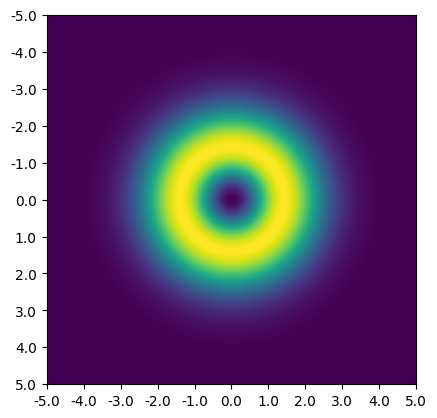

In [3]:
x_grid = np.linspace(-5,5,1000)
x,y = np.meshgrid(x_grid,x_grid)
tmp = (x**2+y**2)*stats.multivariate_normal(mean=[0,0]).pdf(np.array([x.ravel(),y.ravel()]).T).reshape(1000,1000)
plt.imshow(tmp)
plt.xticks(np.linspace(0,1000,11), np.linspace(-5,5,11)); plt.yticks(np.linspace(0,1000,11), np.linspace(-5,5,11));

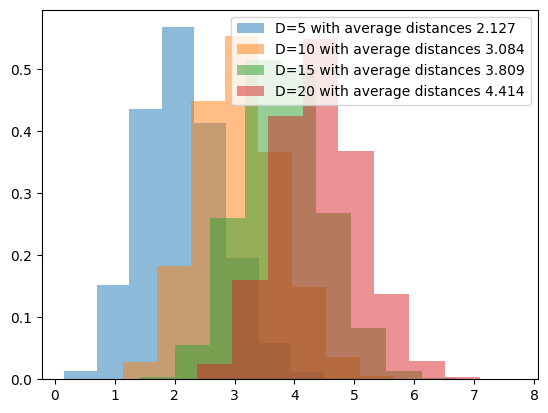

In [4]:
# The "mass" of a "mound" shape in higher dimensions is actually spherical
# as seen by examining the distances from the mean of the sample vectors 
# given by (x**2).sum()**0.5
plt.figure()
n = 100000
for D in range(5,25,5):
    f = stats.multivariate_normal([0]*D)
    x = f.rvs(n)
    plt.hist((x**2).sum(axis=1)**0.5, density=True, alpha=0.5,
             label="D="+str(D)+" with average distances "+str(round(((x**2).sum(axis=1)**0.5).mean(),3)))
plt.legend();

## Hamiltonian Dynamics

A ***log joint probability distribution*** with parameters $\theta$  of interest and ***auxilliary variables*** $v$ with $\dim(v)=\dim(\theta)$ 

$$\Large
\begin{align*}
H(\theta, z) = {} & U(\theta) + K(v|\theta) \\
\text{often simplified to } \Longrightarrow \quad = {} & U(\theta) + K(v) \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad
\end{align*}$$

determines ***Hamiltonian dynamics*** of ***potential*** $U(\theta)$ and ***kinetic*** $K(v)$ ***energy*** (***momentum*** or ***velocity***)<br>which obey the ***law of conservation of energy*** defined by the differential equations 

$$\Large \begin{align*} 
\frac{d\theta}{dt} & = {} \frac{dH}{dv}(v(t)) & \frac{dv}{dt} & = {}  -\frac{dH}{d\theta}(\theta(t))\\
\end{align*}$$

Specifically, $\theta$ and $v$ ***energy*** parameters of a ***Hamiltonian dynamics system*** are evolved by differential equations across time $\theta_0 \overset{time}{\rightarrow} \theta_t$ and $v_0 \overset{time}{\rightarrow} v_t$ so the log joint density (***energy***) stays constant $p(\theta_0, v_0|x) = p(\theta_t, v_t|x)$ 

> The ***potential energy*** $U(\theta)$ and ***kinetic*** $K(v)$ ***energy*** remain inversely synchronized over time so that the total ***energy*** overall always remains constant

- [Radford Neal "MCMC using Hamiltonian dynamics"](https://arxiv.org/pdf/1206.1901)
- [Michael Betancourt "A Conceptual Introduction to Hamiltonian Monte Carlo"](https://arxiv.org/pdf/1701.02434)
- [Alex Rogozhnikov "Hamiltonian Monte Carlo explained"](https://arogozhnikov.github.io/2016/12/19/markov_chain_monte_carlo.html)

### Normal Energy

Consider the ***energy function*** $H(\theta, v)$ made from the ***potential energy*** $U(\theta)$ and ***kinetic energy*** $K(v)$ 

$$H(\theta, v) = U(\theta) + K(v)$$

which is proportional to a ***log of an independent joint distribution*** 

$$H(\theta, v) \propto \log p(\theta, v) = \log[q(\theta)h(v)], \theta \perp\!\!\!\perp v$$

such as an ***isotropic bivariate normal distribution***, in which case

$$ U(\theta) = \frac{1}{2}\theta^2 \quad \text{ and } \quad K(v) = \frac{1}{2}v^2$$

and ***conservation of energy*** $U(\theta) + K(v)$ in this context actually just turns out to imply that $\theta + v$ must be constant as well, since according to the ***Hamiltonian dynamics*** differential equations


\begin{align*} \frac{d\theta}{dt} & = {} \frac{dH}{dv} & \frac{dv}{dt} & = {}  -\frac{dH}{d\theta} \\ & = {} \frac{dK}{dv} = v & & = {}   -\frac{dU}{d\theta}= -\theta  \end{align*}

which ensures that changes in $\theta$ and $v$ over time $t$ are equal and opposite


## Differential Equations


The paths of $\theta$ and $v$ which evolve over time while satisfying these differential equations 
> the (function) solutions to the differential equations 

for the independent standard normal specifications of $U(\theta)$ and $K(v)$ have the form 

$$ \theta_t = \theta(t) = r \cos(a + t) \quad \text{ and } \quad v_t = v(t) = -r \sin(a + t) $$

which for $r=1$ and $a=0$ mean each $\theta(t)$ and $v(t)$ will lie on the unit circle.

<center><font style="color:blue">[Examine sine-cosine evolution relationship]</font></center>


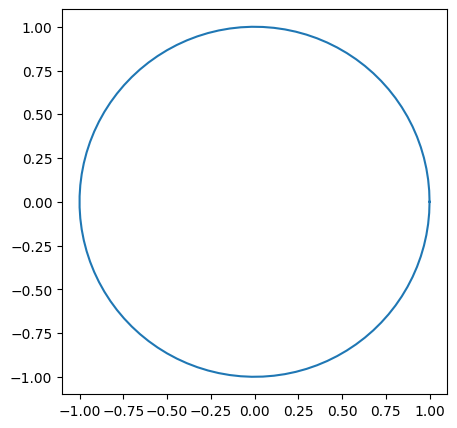

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5)); t = np.linspace(0,2*np.pi, 100)
ax.plot(np.cos(t), -np.sin(t)); ax.set_aspect('equal', adjustable='box') 

## Symplectic Integration<br>(discretely approximated differential equations)


The following numerically approximate the solution trajectory of a differential equations.  These processes are referred to as ***integration*** because they add up all changes over time (like how ***integration*** add up areas under a curve)

1. ***Euler's method***: not a ***symplectic integrator***

| | | | | |
|-|-|-|-|-|
|| $ \begin{align*} 
\theta(t+\epsilon) & = {} \theta(t) + \epsilon \frac{d\theta(t)}{d t}\\
& = {} \theta(t) + \epsilon v(t)
\end{align*}$ | $\quad$ | $  \begin{align*} 
v(t+\epsilon) & = {} v(t) + \epsilon \frac{dv(t)}{d t}\\
& = {} v(t) - \epsilon \theta(t)
\end{align*}$ ||

2. ***Euler's method*** (***improved variant***): a ***first order symplectic integrator***

| | | | | |
|-|-|-|-|-|
|| $ \begin{align*} 
\theta(t+\epsilon) & = {} \theta(t) + \epsilon \frac{d\theta(t)}{d t}\\
& = {} \theta(t) + \epsilon v(t)
\end{align*}$ | $\quad$ | $  \begin{align*} 
v(t+\epsilon) & = {} v(t) + \epsilon \frac{dv(t+\epsilon)}{d t}\\
& = {} v(t) - \epsilon \theta(t+\epsilon)
\end{align*}$ ||

3. The ***leapfrog method*** (or ***leapfrog integration***): a  ***second order symplectic integrator***

| | | | | | |
|-|-|-|-|-|-|
|| $  \begin{align*} 
\theta(t+\epsilon/2) & = {} \theta(t) + \frac{\epsilon}{2} \frac{d\theta(t)}{d t}\\
& = {} \theta(t) + \frac{\epsilon}{2} v(t)
\end{align*}$ | $\quad$ | $  \begin{align*} 
v(t+\epsilon) & = {} v(t) + \epsilon \frac{dv(t+\epsilon/2)}{d t}\\
& = {} v(t) - \epsilon \theta(t+\epsilon/2)
\end{align*}$ | $\quad$ | $  \begin{align*} 
\theta(t+\epsilon) & = {} \theta(t + \epsilon/2) + \frac{\epsilon}{2} \frac{d\theta(t + \epsilon)}{d t}\\
& = {} \theta(t + \epsilon/2) + \frac{\epsilon}{2} v(t+\epsilon)
\end{align*}$|



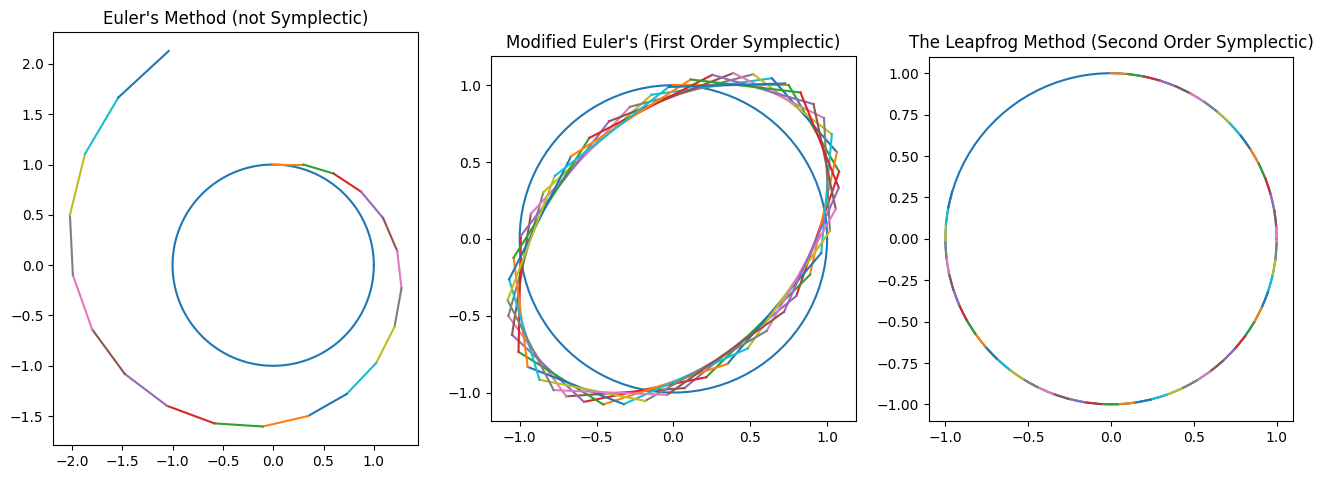

In [6]:
import matplotlib.pyplot as plt; import numpy as np; t = np.linspace(0,2*np.pi, 100); fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8)) 
for i in range(3):
    ax[i].plot(np.cos(t), -np.sin(t)); ax[i].set_aspect('equal', adjustable='box')
theta_t, v_t, t, epsilon = 0, 1, 0, .3; ax[0].set_title("Euler's Method (not Symplectic)")
for i in range(20):
    v_t_e = v_t - epsilon * theta_t; theta_t_e = theta_t + epsilon * v_t; ax[0].plot([theta_t, theta_t_e], [v_t, v_t_e]) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon  
theta_t, v_t, t, epsilon = 0, 1, 0, .75; ax[1].set_title("Modified Euler's (First Order Symplectic)")
for i in range(50):
    v_t_e = v_t - epsilon * theta_t; theta_t_e = theta_t + epsilon * v_t_e; ax[1].plot([theta_t, theta_t_e], [v_t, v_t_e]) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon
theta_t, v_t, t, epsilon = 0, 1, 0, .1; ax[2].set_title("The Leapfrog Method (Second Order Symplectic)")
for i in range(50):
    v_t_e = v_t - epsilon / 2 * theta_t; theta_t_e = theta_t + epsilon * v_t_e; v_t_e = v_t_e - epsilon / 2 * theta_t_e; ax[2].plot([theta_t, theta_t_e], [v_t, v_t_e]) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon

## Hamiltonian Monte Carlo


0.82

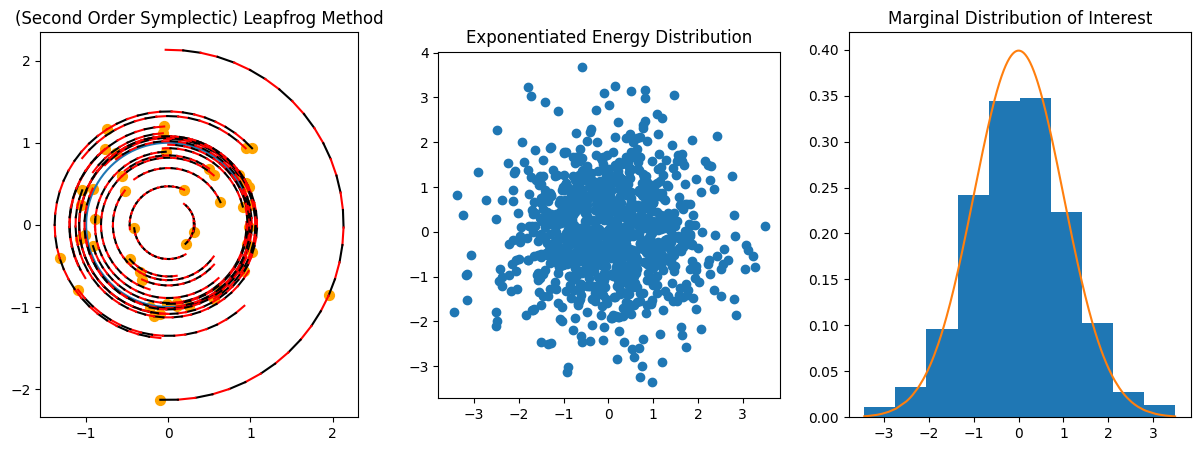

In [7]:
t = np.linspace(0,2*np.pi, 100); 
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(np.cos(t), -np.sin(t))
ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
ax[0].set_title("(Second Order Symplectic) Leapfrog Method")
ax[1].set_title("Exponentiated Energy Distribution")
ax[2].set_title("Marginal Distribution of Interest")

theta_t, v_t, t, epsilon = 0, 1, 0, .1; 

m = 1000
theta_ts = np.zeros(m)
v_ts = np.zeros(m)

plotting = 50
accept = 0
for j in range(m):
    
    v_t_prop = v_t + stats.norm(scale=0.5).rvs()
    MH_acceptance_probability = \
    min(1,stats.norm().pdf(v_t_prop)/stats.norm().pdf(v_t))
    if stats.uniform().rvs()<MH_acceptance_probability:
        v_t = v_t_prop
        accept += 1

    for i in range(stats.poisson(15).rvs()):
        v_t_e = v_t - epsilon / 2 * theta_t
        theta_t_e = theta_t + epsilon * v_t_e
        v_t_e = v_t_e - epsilon / 2 * theta_t_e
        if j < plotting:
            ax[0].plot([theta_t, theta_t_e], [v_t, v_t_e], color=['r','k'][i%2]) 
        theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon
    if j < plotting:
        ax[0].scatter(theta_t, v_t, s=50, color='orange');
        
    theta_ts[j] = theta_t
    v_ts[j] = v_t
        
ax[1].scatter(theta_ts, v_ts)
ax[2].hist(theta_ts, density=True)
ax[2].plot(sorted(theta_ts), stats.norm().pdf(sorted(theta_ts)))
accept/m